In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rz(angle):
    angle=np.deg2rad(angle)
    array=np.array([[np.cos(angle), np.sin(angle), 0], [-1*np.sin(angle), np.cos(angle), 0], [0,0,1]])
    return(array)
def ry(angle):
    angle=np.deg2rad(angle)
    array=np.array([[np.cos(angle),0,-1*np.sin(angle)], [0,1,0], [np.sin(angle), 0, np.cos(angle)]])
    return(array)
def euler_angle2matrix(rot,tilt,psi):
    a1, a2, a3 = np.deg2rad(rot), np.deg2rad(tilt), np.deg2rad(psi)
    c1 = np.cos(a1)
    c2 = np.cos(a2)
    c3 = np.cos(a3)
    s1 = np.sin(a1)
    s2 = np.sin(a2)
    s3 = np.sin(a3)
    array=np.array([[c3*c2*c1-s3*s1, c3*c2*s1+s3*c1, -c3*s2],
                    [-s3*c2*c1-c3*s1, -s3*c2*s1+c3*c1, s3*s2],
                    [s2*c1, s2*s1, c2]])
    return(array)

螺旋的规律

rise twist

[[ -51]
 [-199]
 [   1]]
OX: [334.67526659 398.8385216  454.87894238 497.02261234 520.92741497
 524.13040774 506.30158219 469.27786512 416.87385771 354.4888122 ] 
OY: [115.09359075 130.29895227 165.0494566  215.76471461 277.21946807
 343.08195473 406.56627793 461.13156623 501.15588782 522.51548542] 
OZ: [361.80871154 402.61742308 443.42613462 484.23484615 525.04355769
 565.85226923 606.66098077 647.46969231 688.27840385 729.08711538]


<IPython.core.display.Javascript object>


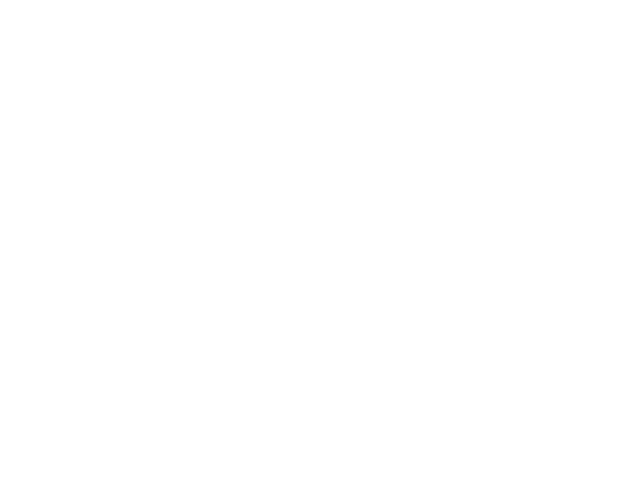

In [2]:
%matplotlib notebook

rsie = 42.44106/1.04
twist = 18.47096  
in_point=np.array([[269],[121],[321]])
p1=in_point-320
print(p1)
ox=[]
oy=[]
oz=[]
for i in range(10):
    p2=(rz(twist).T).dot(p1)
    p2[2]+=rsie
    #print(p2)
    p1=p2
    ox.append(p2[0][0]+320)
    oy.append(p2[1][0]+320)
    oz.append(p2[2][0]+320)
print("OX:",np.array(ox),"\nOY:", np.array(oy),"\nOZ:", np.array(oz))

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim(0,640)
ax.set_ylim(0,640)
ax.set_zlim(0,640)
ax.scatter(269,121,321, marker=".")
ax.scatter(ox, oy, oz, marker="*")
plt.show()

C14

<IPython.core.display.Javascript object>


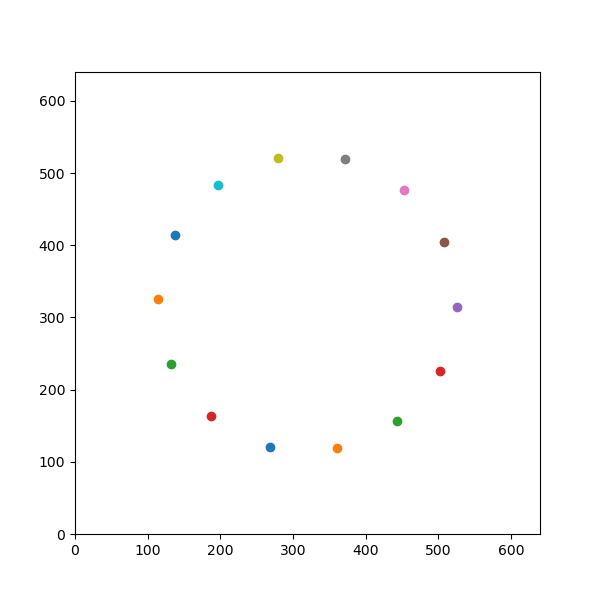

[[269.]
 [121.]
 [320.]]
[[360.39345182]
 [118.57912459]
 [320.        ]]
[[443.78648512]
 [156.05212382]
 [320.        ]]
[[502.66208689]
 [225.99701062]
 [320.        ]]
[[525.35922216]
 [314.56034234]
 [320.        ]]
[[507.38244491]
 [404.20106496]
 [320.        ]]
[[452.29227635]
 [477.16473402]
 [320.        ]]
[[371.]
 [519.]
 [320.]]
[[279.60654818]
 [521.42087541]
 [320.        ]]
[[196.21351488]
 [483.94787618]
 [320.        ]]
[[137.33791311]
 [414.00298938]
 [320.        ]]
[[114.64077784]
 [325.43965766]
 [320.        ]]
[[132.61755509]
 [235.79893504]
 [320.        ]]
[[187.70772365]
 [162.83526598]
 [320.        ]]


In [7]:
%matplotlib notebook

in_point=np.array([[269],[121],[320]])
p1=in_point-320

plt.figure(figsize=(6,6))
for i in range(0,14):
    angle=i*360/14
    op=(rz(angle).T).dot(p1)+320
    print(op)
    plt.scatter(op[0][0],op[1][0])
plt.xlim(0,640)
plt.ylim(0,640)
plt.show()

### 测试
一个点 C14后的投影

先转动点 = 先修改rottation matrix

注意这里最后的xy和oxoy的区别，x=-ox。 因为ox表示particle到refercence的移动距离

In [4]:
%matplotlib notebook

sym="C"
sym_num=14
rot = 116.533127
tilt = 96.133881
psi = 61.409645
ox = -8.39357
oy = -14.3283
in_point = np.array([[269],[121],[320]])
p1 = in_point-320
coor1x,coor1y = [],[]
coor2x,coor2y = [],[]


plt.figure(figsize=(6,6))

def m2a(m):
    rot=

for i in range(0,sym_num):
    angle=i*360/sym_num
    # 先转点
    op=(rz(angle).T).dot(p1)
    rot_coor=rz(psi).dot(ry(tilt)).dot(rz(rot)).dot(op)
    coor1x.append(rot_coor[0][0]-ox+320)
    coor1y.append(rot_coor[1][0]-oy+320)
    #print(rot_coor[0][0]-ox, rot_coor[1][0]-oy)
    # 先转欧拉角
    rot_angle=np.dot(rz(psi).dot(ry(tilt)).dot(rz(rot)),rz(angle).T)
    rot_coor2=rot_angle.dot(p1)
    coor2x.append(rot_coor2[0][0]-ox+320)
    coor2y.append(rot_coor2[1][0]-oy+320)

plt.scatter(coor1x, coor1y)
plt.scatter(coor2x, coor2y, marker='*')
plt.xlim(0,640)
plt.ylim(0,640)
plt.show()

print([round(i-320) for i in coor1x])
print([round(i-320) for i in coor1y])
#print([int(i-320+0.5) for i in coor2x]) # 四舍五入
#print([int(i-320) for i in coor2y])

SyntaxError: invalid syntax (Temp/ipykernel_18932/3750774660.py, line 19)

<IPython.core.display.Javascript object>


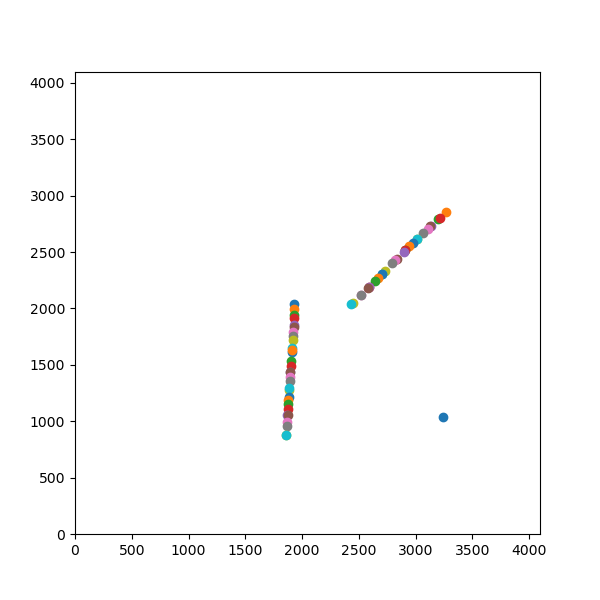

34.96009153306095


In [22]:
%matplotlib notebook
# cat ../P9_J68_old_bin1.star | grep b_0002_distortion_SumCorr | awk {'print "("$19-$5"\t"$20-$6"),"'} |sed 's/\t/,/g'
# coor1 coorxy
# coor2 cootxy - oxy
coor=[(3246.000000,1015.000000),
(3263.000000,2867.000000),
(3199.000000,2804.000000),
(3199.000000,2805.000000),
(3139.000000,2742.000000),
(3139.000000,2741.000000),
(3093.000000,2694.000000),
(3061.000000,2655.000000),
(3033.000000,2626.000000),
(3005.000000,2611.000000),
(2979.000000,2584.000000),
(2946.000000,2537.000000),
(2912.000000,2518.000000),
(2916.000000,2503.000000),
(2906.000000,2484.000000),
(2834.000000,2421.000000),
(2806.000000,2422.000000),
(2780.000000,2399.000000),
(2750.000000,2340.000000),
(2702.000000,2319.000000),
(2704.000000,2292.000000),
(2664.000000,2253.000000),
(2630.000000,2248.000000),
(2593.000000,2207.000000),
(2597.000000,2184.000000),
(2575.000000,2163.000000),
(2515.000000,2134.000000),
(2531.000000,2119.000000),
(2469.000000,2056.000000),
(2439.000000,2039.000000),
(1926.000000,2040.000000),
(1923.000000,2009.000000),
(1921.000000,1951.000000),
(1939.000000,1905.000000),
(1918.000000,1864.000000),
(1916.000000,1834.000000),
(1914.000000,1778.000000),
(1912.000000,1755.000000),
(1909.000000,1725.000000),
(1905.000000,1667.000000),
(1901.000000,1614.000000),
(1902.000000,1614.000000),
(1900.000000,1544.000000),
(1896.000000,1493.000000),
(1904.000000,1437.000000),
(1891.000000,1437.000000),
(1889.000000,1378.000000),
(1897.000000,1342.000000),
(1883.000000,1288.000000),
(1882.000000,1287.000000),
(1890.000000,1211.000000),
(1888.000000,1179.000000),
(1883.000000,1154.000000),
(1883.000000,1116.000000),
(1879.000000,1040.000000),
(1879.000000,1041.000000),
(1876.000000,977.000000),
(1870.000000,949.000000),
(1866.000000,893.000000),
(1853.000000,862.000000)
]
coor2=[(3240.72,1034.16),
(3265.32,2857.19),
(3199.84,2793.84),
(3215.51,2805.32),
(3134.34,2729.24),
(3129.06,2732.25),
(3105.9,2705.94),
(3067.88,2668.01),
(3014.65,2618.85),
(3014.75,2618.55),
(2975.65,2580.25),
(2945.42,2549.2),
(2909.87,2514.87),
(2910.16,2515.76),
(2899.15,2502.35),
(2835.09,2441.12),
(2821.46,2425.55),
(2795.47,2399.72),
(2731.15,2333.75),
(2705.44,2307.49),
(2705.24,2307.85),
(2666.36,2268.96),
(2641.02,2242.78),
(2590.45,2190.35),
(2590.54,2190.24),
(2576.57,2177.48),
(2516.05,2117.85),
(2515.67,2117.27),
(2450.71,2050.95),
(2435.46,2041.71),
(1930.41,2042.81),
(1931.03,1998.47),
(1928.98,1940.17),
(1929.48,1911.74),
(1928.57,1855.17),
(1925.89,1834.75),
(1923.51,1795.27),
(1919.33,1753.76),
(1919.36,1716.68),
(1913.66,1650.38),
(1911.46,1613.51),
(1912.97,1630.17),
(1905.69,1531.24),
(1901.97,1489.2),
(1895.76,1433.1),
(1896.61,1433.7),
(1893.01,1392.73),
(1891.36,1353.27),
(1887.49,1275.1),
(1886.89,1293.95),
(1881.71,1213.5),
(1880.55,1191.78),
(1876.88,1153.77),
(1874.93,1109.96),
(1870.95,1052.35),
(1872.7,1052.83),
(1866.97,992.08),
(1863.7,955.035),
(1856.9,876.435),
(1856.67,875.069)]
#coor=[(1866.000000,893.000000),(1853.000000,862.000000)]

plt.figure(figsize=(6,6))
for i in coor2:
    plt.scatter(i[0],i[1])

plt.xlim(0,4096)
plt.ylim(0,4096)
plt.show()
print(((1866-1853)**2+(893-862)**2)**0.5*1.04)